<a href="https://colab.research.google.com/github/GawainGan/Causal-Inference/blob/main/Causal%20Inference%20and%20Discovery%20in%20Python/Chap_6_d_seperation__back_front_door__IV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from itertools import combinations

import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import graphviz

In [ ]:
COLORS = [
    '#00B0F0',
    '#FF0000'
]

### Example 1

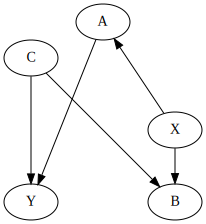

In [ ]:
graph = graphviz.Digraph(format='png', engine='neato')

nodes = ['A', 'X', 'B', 'Y', 'C']
positions = ['2,2.5!', '3,1!', '3,0!', '1, 0!', '1,2!']

edges = ['XA', 'XB', 'CB', 'CY', 'AY']

[graph.node(n, pos=pos) for n, pos in zip(nodes, positions)]
graph.edges(edges)

graph.render(f'img/ch_06_d_sep_04')

graph

## DAG结构分析

给定的DAG包含五个节点：A, B, C, X, Y，其中X到Y有两条主要路径：

1. X → A → Y（前向路径）
2. X → B ← C → Y（碰撞路径）

## 因果效应分析

要正确估计X对Y的因果效应，我们需要阻断所有非因果路径，同时保持因果路径开放。

### 策略1：仅控制节点A（最佳策略）

- 路径X → A → Y：控制A阻断了这条非因果路径。
- 路径X → B ← C → Y：这是一个碰撞路径，默认是阻断的，不需要额外控制。

这个策略有效地阻断了所有非因果路径，同时保持了X → Y的直接因果效应。

### 策略2：控制节点A、B和C

- 路径X → A → Y：控制A阻断了这条路径。
- 路径X → B ← C → Y：控制B打开了碰撞路径，但控制C又重新阻断了它。

这个策略虽然也能阻断所有非因果路径，但控制了不必要的变量（B和C），可能引入额外的偏差。

### 策略3：仅控制节点A，不控制B和C

这与策略1相同，是最优选择。

## 碰撞路径的深入理解

在X → B ← C这种碰撞路径中：

1. 默认情况下，X和C是独立的，信息不能通过B传递。
2. 控制B会引入X和C之间的相关性，因为我们在观察特定B值下X和C的联合分布。

### 控制B的影响

- 不是将B变成"常数"，而是创造了一个条件，使X和C变得相关。
- 可以理解为打开了一个新的信息传递通道，使X和C不再独立。

## 最佳策略总结

1. 仅控制节点A是估计X对Y因果效应的最佳策略。
2. 这样可以阻断非因果路径X → A → Y。
3. 碰撞路径X → B ← C → Y默认是阻断的，不需要额外控制。
4. 避免控制B和C，因为这可能引入不必要的偏差。

## 直观解释

想象X是"学习时间"，Y是"考试成绩"，A是"知识掌握程度"，B是"压力水平"，C是"家庭环境"。

- 控制A（知识掌握程度）可以帮助我们更准确地估计额外学习时间对考试成绩的直接影响。
- 不控制B（压力水平）和C（家庭环境）是正确的，因为它们形成了一个自然阻断的碰撞路径，不会混淆X和Y之间的关系。

通过这种方式，我们可以最准确地估计学习时间对考试成绩的真实因果效应。

### Example 2

Source from: [Link](https://www.youtube.com/watch?v=yIwTzdwVz0Q&list=PLoazKTcS0Rzb6bb9L508cyJ1z-U9iWkA0&index=25)

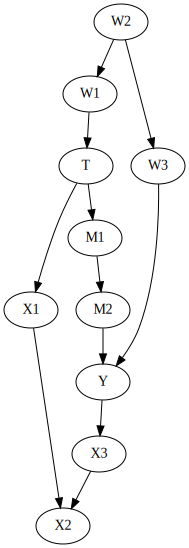

In [ ]:
# Create a new directed graph
graph = graphviz.Digraph(format='png', )

# Define nodes
nodes = ['W2', 'W1', 'W3','T', 'M1', 'M2', 'Y', 'X1', 'X3', 'X2']

# Add nodes to the graph
for node in nodes:
    graph.node(node)

# Define edges
edges = [
    ('W2', 'W1'),('W2', 'W3'),
    ('W1', 'T'), ('W3', 'Y'),
    ('T', 'M1'), ('M1', 'M2'), ('M2', 'Y'),
    ('T', 'X1'), ('Y', 'X3'),
    ('X1', 'X2'), ('X3', 'X2')
]

# Add edges to the graph
for edge in edges:
    graph.edge(*edge)

# Render the graph to a file
graph.render(filename='/mnt/data/causal_graph')

# Output the graph as PNG
graph

### Q: Is T and Y d-separated by the empty set?

Unblocked path: T -> M1 -> M2 -> Y
If we control M1 or M2: then we make T & Y d-separated


**因果推断分析: T和Y的d-分离**

### 1. 图的结构分析

首先,让我们分析一下给定的有向无环图(DAG):

```
 W2 --> W1 -->  T --> M1 --> M2 --> Y
 |              |                   ^
 |              v                   |
 +-> W3 ------> Y                   |
                |                   |
                v                   |
                X3 ----> X2 <----- X1
```

### 2. d-分离的定义

两个节点被称为d-分离(d-separated),如果它们之间的所有路径都被阻塞。一个路径被阻塞,如果:

1. 路径上有一个链接结构(A -> M -> B)或分叉结构(A <- M -> B),且中间变量M被控制(调节)。
2. 路径上有一个碰撞结构(A -> M <- B),且M及其后代都没有被控制。

### 3. T和Y之间的路径分析

在给定的图中,T和Y之间存在以下路径:

1. T -> M1 -> M2 -> Y
2. T -> X1 -> X2 <- X3 <- Y

### 4. 空集条件下的d-分离分析

问题问的是T和Y是否被空集d-分离。这意味着我们不控制任何变量。

- 路径1 (T -> M1 -> M2 -> Y) 是开放的,因为它是一个链接结构,没有被控制的变量。
- 路径2 (T -> X1 -> X2 <- X3 <- Y) 是封闭的,因为X2是一个碰撞节点(collider),且没有被控制。

结论: T和Y在空集条件下不是d-分离的,因为存在一个开放路径(路径1)。

### 5. 控制M1或M2的影响

如果我们控制M1或M2:

- 路径1将被阻塞,因为控制了链接结构中的中间变量。
- 路径2保持封闭状态。

在这种情况下,T和Y将变成d-分离的,因为所有路径都被阻塞了。

### 6. 结论

- 在不控制任何变量的情况下(空集条件),T和Y不是d-分离的。
- 如果控制M1或M2,T和Y将变成d-分离的。

### Example 3

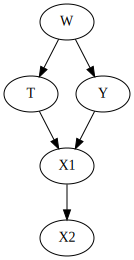

In [ ]:
# Create a new directed graph
graph = graphviz.Digraph(format='png', )

# Define nodes
nodes = ['W','T','Y','X1','X2']

# Add nodes to the graph
for node in nodes:
    graph.node(node)

# Define edges
edges = [
    ('W','T'), ('W', 'Y'),
    ('T', 'X1'), ('Y', 'X1'),
    ('X1', 'X2')
]

# Add edges to the graph
for edge in edges:
    graph.edge(*edge)

# Render the graph to a file
graph.render(filename='/mnt/data/causal_graph2')

# Output the graph as PNG
graph

### 因果推断分析：控制W和X2时T和Y的d-分离


**1. 路径分析**

在这个图中，T和Y之间存在以下路径：

1. T ← W → Y （叉结构/分叉）
2. T → X1 ← Y （碰撞器结构）

**2. 控制变量的影响**

我们被要求控制W和X2。让我们分析这样做的影响：

- 控制W：
  - 这会阻断路径 T ← W → Y
  - W是T和Y的共同原因（混杂因子），控制它可以阻断这个"后门路径"

- 控制X2：
  - X2是X1的后代
  - X1是路径 T → X1 ← Y 上的碰撞器
  - 控制碰撞器的后代（在这里是X2）会打开通过碰撞器的路径

**3. d-分离分析**

两个变量被认为是d-分离的，如果它们之间的所有路径都被阻断。一个路径被阻断，如果：

1. 路径包含一个链式结构 A → B → C 或叉结构 A ← B → C，且中间变量B被控制
2. 路径包含一个碰撞器结构 A → B ← C，且B及其后代都没有被控制

在我们的情况下：

- 路径1（T ← W → Y）被控制W阻断了
- 路径2（T → X1 ← Y）原本是被阻断的（因为X1是碰撞器），但控制X2（X1的后代）打开了这条路径

**4. 结论**

因此，当控制W和X2时，T和Y不是d-分离的。虽然控制W阻断了一条路径，但控制X2打开了通过碰撞器X1的路径，创造了T和Y之间的依赖关系。


这个例子展示了因果推断中的一个重要原则：有时控制某个变量可能会创造原本不存在的依赖关系，特别是在处理碰撞器结构时。在实际的研究或分析中，这意味着我们需要谨慎选择要控制的变量，因为不恰当的控制可能会导致错误的结论。

### Example 4

Source From [Link](https://www.youtube.com/watch?v=yoPk3PL9-KY)

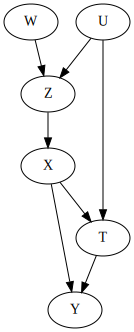

In [ ]:
# Create a new directed graph
graph = graphviz.Digraph(format='png', )

# Define nodes
nodes = ['W','Z','X','U','T', 'Y']

# Add nodes to the graph
for node in nodes:
    graph.node(node)

# Define edges
edges = [
    ('W','Z'),
    ('U', 'Z'),
    ('U', 'T'),
    ('Z', 'X'),('X','T'), ('X', 'Y'),
    ('T', 'Y')
]

# Add edges to the graph
for edge in edges:
    graph.edge(*edge)

# Render the graph to a file
graph.render(filename='/mnt/data/causal_graph4')

# Output the graph as PNG
graph

**Q1: Are W and Y marginally independent of each other? W和Y是否边际独立？**

Two Cases:

  Unblocked
  - W -> Z -> X -> Y Chain
  - W -> Z -> X -> T -> Y Chain

Blocked
  - **W -> Z <- U** -> T -> Y Collider, Blocked the path from W & Y
  - **W -> Z <- U** -> T <- X -> Y Collider & Fork, Blocked the path from W & Y

答案：是的，W和Y在边际上是独立的。

分析过程：
1. 识别所有从W到Y的路径：
   a) W → Z → X → Y
   b) W → Z → X → T → Y
   c) W → Z ← U → T → Y
   d) W → Z ← U → T ← X → Y

2. 分析每条路径：
   - 路径a和b是链式结构，没有被阻塞。
   - 路径c和d包含碰撞结构(W → Z ← U)，因此被阻塞。

3. d-分离原则应用：
   - 在没有条件的情况下，包含碰撞结构的路径（c和d）是自然被阻塞的。
   - 链式结构（a和b）在没有条件时是开放的。

4. 结论：
   虽然存在开放路径（a和b），但这些路径都经过了Z。Z作为W和U的共同结果（碰撞点），阻断了W通过这些路径影响Y的可能性。因此，W和Y在边际上是d-分离的，即独立的。

---

**Q2: Which variables should we condition upon in order to make W and Y conditionally independent? 应该控制哪些变量以使W和Y条件独立？**
- Block the blocked path without unblocking the cloked paths
- Condition on X will make W and Y conditionally independent in both "Blocked and Unblocked cases"
- Condition on both T & Z: W -> (Z&U) -> (T&X) -> Y, unblock Colliders, make W & Y dependent


正确答案：
1. 控制X可以使W和Y条件独立。
2. 控制Z也可以使W和Y保持独立。
3. 同时控制T和Z会使W和Y变得依赖。

详细分析：

1. 控制X：
   - 阻断路径：W → Z → X → Y 和 W → Z → X → T → Y
   - 不会打开任何被阻塞的路径
   - 结果：W和Y条件独立

2. 控制Z：
   - 阻断路径：W → Z → X → Y 和 W → Z → X → T → Y
   - 不会打开碰撞结构 W → Z ← U
   - 结果：W和Y保持独立

3. 控制T和Z：
   - 控制Z阻断了W → Z → X → Y
   - 但同时控制T打开了路径 W → Z ← U → T → Y
   - 结果：创造了W和Y之间的依赖关系

4. 仅控制T：
   - 不足以阻断所有开放路径
   - 可能会部分打开 W → Z ← U → T → Y
   - 结果：不足以使W和Y条件独立

结论：
要使W和Y条件独立，最佳选择是控制X或Z。控制T不足以实现独立，而同时控制T和Z反而会创造依赖。

# Back-door Criterion


- Can we nonparametrically identify the causal effect of T on Y given a set of variables X?

- Backdoor ceiterion for X:
  - No vertex in X is a decendent of T (no post-treatment bias), and
  - X blockes all paths between T and Y wih an incoming arrow into T (backdoor paths)

- Idea: Block all non-causal paths

### Example 5
Source from [Link](https://youtu.be/yoPk3PL9-KY?t=844)

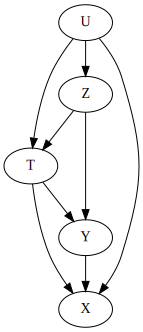

In [ ]:
# Create a new directed graph
graph = graphviz.Digraph(format='png', )

# Define nodes
nodes = ['U','Z','X','T', 'Y']

# Add nodes to the graph
for node in nodes:
    graph.node(node)

# Define edges
edges = [
    ('U','Z'),
    ('Y','X'),('Z','Y'),('T','X'),
    ('U', 'X'),
    ('U', 'T'),
    ('Z', 'T'),
    ('T', 'Y'),

]

# Add edges to the graph
for edge in edges:
    graph.edge(*edge)

# Render the graph to a file
graph.render(filename='/mnt/data/causal_graph5')

# Output the graph as PNG
graph

**Question: Can we identify the causal effect of T on Y**


答案：是的，我们可以识别T对Y的因果效应。

分析过程：

1. 首先，我们需要识别所有从T到Y的后门路径（backdoor paths）：

   a) T ← Z → Y
   b) T ← U → X ← Y
   c) T ← Z ← U → X ← Y
   d) T ← U → Z → Y

2. 应用后门准则（Backdoor Criterion）：
   - 我们需要找到一组变量，它们能阻断所有后门路径，但不是T的后代。

3. 分析每条路径：

   a) T ← Z → Y：这是一个开放的分叉结构（fork）。控制Z可以阻断这条路径。
   
   b) T ← U → X ← Y：这条路径在X处被阻断（X是碰撞节点/collider）。无需额外控制。
   
   c) T ← Z ← U → X ← Y：同样在X处被阻断。无需额外控制。
   
   d) T ← U → Z → Y：这是一个开放路径。控制Z或U都可以阻断这条路径。

4. 选择控制变量：
   - 控制Z足以阻断所有开放的后门路径。
   - Z不是T的后代，满足后门准则的第二个条件。

5. 识别策略：
   使用条件期望来估计因果效应：

   $ P(Y(t)) = \displaystyle\sum\limits_{z}{P(Y | T = t, Z = z) P(Z = z)}$

   这个公式是正确的，它表示了通过Z调整后的T对Y的因果效应。

6. 额外说明：
   - 控制U也可以阻断所有后门路径，但U是不可观测的（通常用椭圆表示），所以我们不能在实际中使用它。
   - 控制X是不必要的，而且可能引入偏差，因为X是T和Y的共同结果（碰撞节点）。

结论：
我们可以通过控制Z来非参数地识别T对Y的因果效应。这满足了后门准则，允许我们估计干预分布P(Y(t))，从而评估T对Y的因果影响。

这个分析显示了图形模型在因果推断中的重要性，它帮助我们系统地识别和处理复杂的因果关系。




# 拆解因果推断中的后门法则

https://www.lianxh.cn/details/1323.html

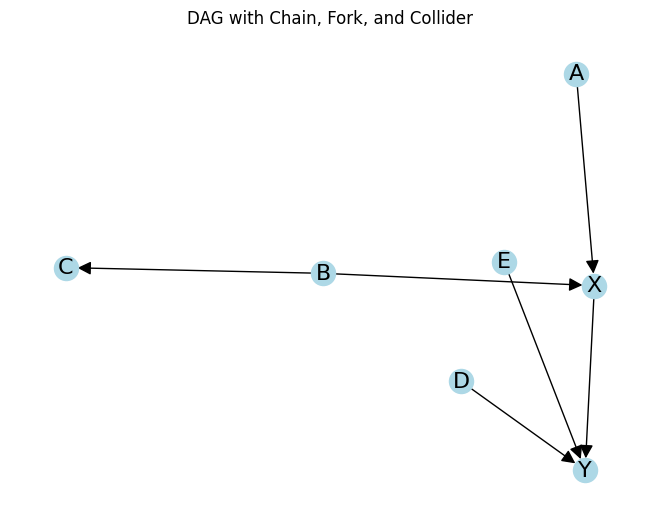

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# 创建DAG
G = nx.DiGraph()
G.add_edges_from([
    ('A', 'X'), ('X', 'Y'),  # Chain
    ('B', 'X'), ('B', 'C'),  # Fork
    ('D', 'Y'), ('E', 'Y')   # Collider
])

# 绘制DAG
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue',
        node_size=300, arrowsize=20, font_size=16)
plt.title("DAG with Chain, Fork, and Collider")
plt.show()

直接因果路径： X -> Y
后门路径（Backdoor paths）：
X <- A
X <- B -> C

前门路径（Front-door paths）：
在这个图中没有明确的前门路径。

分析：

为了估计X对Y的因果效应，我们需要阻断所有后门路径。
对于后门路径 X <- A，我们需要控制A。
对于后门路径 X <- B -> C，我们需要控制B。注意，我们不需要控制C，因为它不在X和Y之间的路径上。

```
后门路径分析纠正

关于后门路径，路径X <- B -> C 需要稍微澄清。
虽然 X <- B 确实是一个后门路径，但 B -> C 并不直接影响 Y，所以严格来说，它不构成一个完整的后门路径
```


我们不应该控制D或E，因为它们是Y的后代（形成了一个collider）。控制它们可能会引入偏差。
因此，为了估计X对Y的因果效应，我们需要在给定A和B的条件下估计X和Y的关系。

----

## 图结构确认
- 链（Chain）: A -> X -> Y
- 分叉（Fork）: B -> X, B -> C
- 对撞结构（Collider）: D -> Y <- E

## 路径分析
1. 直接因果路径：
   - X -> Y （正确）

2. 后门路径：
   - X <- A （正确）
   - X <- B -> C （部分正确，但需要澄清）
     实际上，X <- B 是一个后门路径，但 B -> C 不直接影响 Y，所以不构成完整的后门路径。

3. 前门路径：
   - 此图中没有明确的前门路径。

## 因果效应估计

为估计 X 对 Y 的因果效应，我们需要：

1. 阻断所有后门路径：
   - 控制 A 来阻断 X <- A
   - 控制 B 来阻断 X <- B

2. 避免引入偏差：
   - 正确地不控制 C，因为它不在 X 和 Y 之间的路径上
   - 正确地不控制 D 和 E，因为它们是 Y 的后代，形成了一个对撞结构

3. 估计策略：
   - 在给定 A 和 B 的条件下估计 X 和 Y 的关系
   - 可以使用条件期望：E[Y|do(X=x), A, B]


# Front-door in practice

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
COLORS = [
    '#00B0F0',
    '#FF0000'
]

In [ ]:
# First, we'll build a structural causal model (SCM) 定义结构性因果模型
class GPSMemorySCM:

    def __init__(self, random_seed=None):
        self.random_seed = random_seed
        self.u_x = stats.truncnorm(0, np.infty, scale=5) # X：控制GPS usage的外生变量
        self.u_y = stats.norm(scale=2)                   # Z：Hippcmp Vol变量
        self.u_z = stats.norm(scale=2)                   # Y：Spatial memory存储空间
        self.u = stats.truncnorm(0, np.infty, scale=4)   # Motivation(U)：控制X和Y的另一个外生变量，这个是confounder

    def sample(self, sample_size=100, treatment_value=None):
        """Samples from the SCM"""
        if self.random_seed:
            np.random.seed(self.random_seed)

        u_x = self.u_x.rvs(sample_size)
        u_y = self.u_y.rvs(sample_size)
        u_z = self.u_z.rvs(sample_size)
        u = self.u.rvs(sample_size)

        if treatment_value: # treatment_value是一个固定之，即专门用来空时GPS的使用量
        # 当 treatment_value 被指定时，sample 方法会直接将 gps 变量设置为这个值，而不是基于随机变量 u_x 和 u 的计算结果。
        # 这意味着所有样本的 gps 值都相同，这种设置允许我们观察在特定的 GPS 使用水平下，海马体活动和记忆表现的变化。
            gps = np.array([treatment_value]*sample_size)
        else:
            gps = u_x + 0.7*u

        hippocampus = -0.6*gps + 0.25*u_z # 海马体活动，收到GPS直接的影响，以及自身的Uz(confounder)影响
        # 这里的系数 -0.6 表示 GPS 使用量对海马体活动的负面影响。这个负值系数意味着随着 GPS 使用时间的增加，海马体活动会减少。
        # 这种设置是基于我们自身的假设，即过多使用 GPS 可能会减少大脑中海马体的活动（可能是因为依赖GPS会减少空间记忆的自主使用）
        memory = 0.7*hippocampus + 0.25*u #记忆表现，受hippocampus和Motivation(U)的影响。

        return gps, hippocampus, memory

    def intervene(self, treatment_value, sample_size=100):
        """Intervenes on the SCM"""
        return self.sample(treatment_value=treatment_value, sample_size=sample_size)

In [ ]:
# Instantiate the SCM
scm = GPSMemorySCM()

# Generate observational data
gps_obs, hippocampus_obs, memory_obs = scm.sample(600)

# Run an experiment
treatments = []
experiment_results = []

# Sample over various treatments
for treatment in np.arange(1, 21):
  # 这个循环的目的是模拟不同的 GPS 使用时间（从1小时到20小时）对记忆表现的影响。
  # 通过固定 GPS 使用时间（即对系统进行干预），可以观察到在每种情况下的记忆表现（memory）是如何变化的。
    gps_hours, hippocampus, memory = scm.intervene(treatment_value=treatment, sample_size=30)
    experiment_results.append(memory)
    treatments.append(gps_hours)

In [ ]:
gps_obs[:10]# GPS使用量的观察值

array([ 2.5851742 ,  3.82874867,  5.75151695,  7.43977222, 12.46879829,
        6.87246138,  6.49505004, 10.21043239,  6.14282061,  1.12738523])

In [ ]:
memory_obs[:10] # 记忆表现的观察值

array([-0.93085543, -1.85900326, -1.74180214, -2.82516113, -3.50096156,
       -2.23028502, -2.03070235, -2.44689782, -2.88035203, -0.23233331])

In [ ]:
# 对GPS使用量的控制，从1开始，到20
treatments[0]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
# 其实验结果，即最终我们需要的记忆表现
experiment_results[0]

array([-0.68602087, -0.35186056,  1.0998356 ,  1.09958087,  1.21163755,
        0.20817554, -0.6544778 ,  1.56698006, -0.12022175,  0.04459353,
        0.18367782,  0.21633577, -0.55055737, -0.35855594,  0.593441  ,
       -0.63166786,  1.50849808,  0.63551272,  0.55269674, -0.4042673 ,
        0.57277545,  0.31044457,  0.26304939,  1.71482899,  1.01699456,
       -0.08416589, -0.15193916, -0.42287793, -0.11201098,  1.87073223])

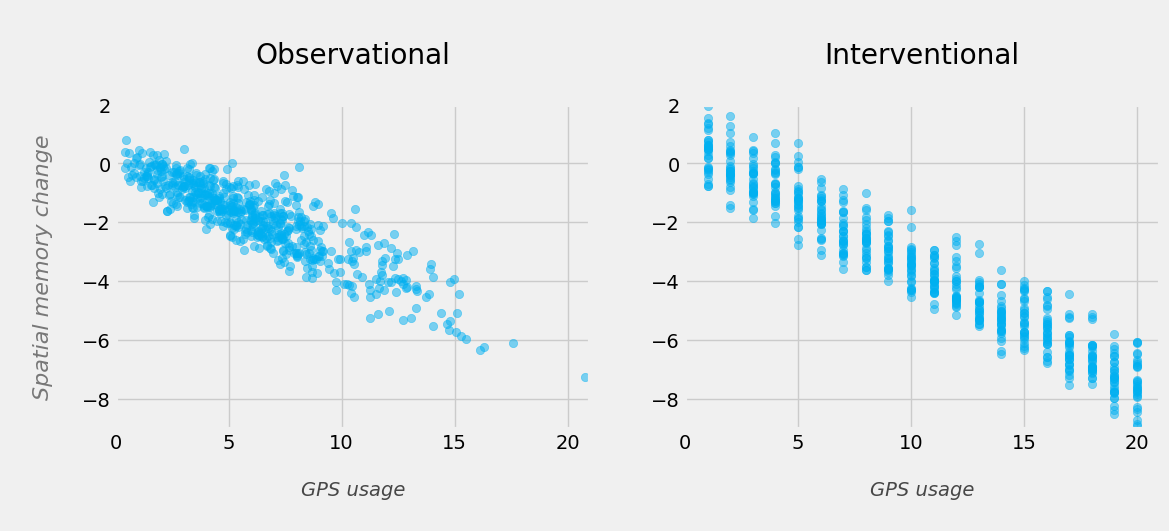

In [ ]:
# Plot observational data
plt.figure(figsize=(12, 4))

# Observational
# 我们
plt.subplot(121)
plt.scatter(gps_obs, memory_obs, alpha=.5, color=COLORS[0])
plt.xlim(0, 21)
plt.ylim(-9, 2)

plt.title('\nObservational\n')
plt.xlabel('\nGPS usage', alpha=.7, fontsize=14, style='italic')
plt.ylabel('\nSpatial memory change\n', alpha=.5, fontsize=16, style='italic')


# Interventional
plt.subplot(122)

plt.scatter(treatments, experiment_results, alpha=.5, color=COLORS[0])
plt.xlim(0, 21)
plt.ylim(-9, 2)

plt.title('\nInterventional\n')
plt.xlabel('\nGPS usage\n', alpha=.7, fontsize=14, style='italic')

plt.show()

## Fit linear regression models

fit two linear regression models:
- one on the observational data: `x:y = gps_obs : memoey_obs`
- one on the interventional data: `x:y = treatments : experiment_results`
- compare the results

In [ ]:
# naive model 1
# 使用观察值来你和模型
lr_naive = LinearRegression()
lr_naive.fit(
    X=gps_obs.reshape(-1, 1),
    y=memory_obs
)

LinearRegression()

In [ ]:
# experimental model
treatments_unpack = np.array(treatments).flatten() # 把20个array全部放进一个array中
results_unpack = np.array(experiment_results).flatten()

# 使用模拟值来你和模型
lr_experiment = LinearRegression()
lr_experiment.fit(
    X=treatments_unpack.reshape(-1, 1),
    y=results_unpack
)

LinearRegression()

In [ ]:
X_test = np.arange(1, 21).reshape(-1, 1) # 创建testing set X，从1到20，让两个LR模型分别预测

preds_naive = lr_naive.predict(X_test)
preds_experiment = lr_experiment.predict(X_test)

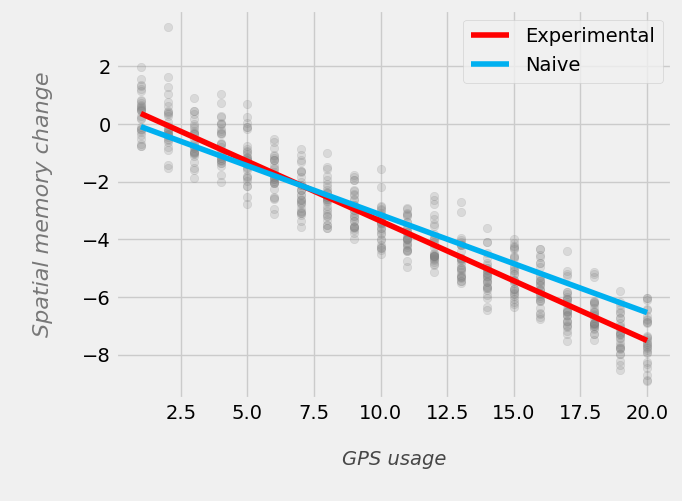

In [ ]:
plt.scatter(treatments, experiment_results, alpha=.2, color='gray')
plt.plot(X_test, preds_experiment, label='Experimental', color=COLORS[1])
plt.plot(X_test, preds_naive, label='Naive', color=COLORS[0])

plt.xlabel('\nGPS usage\n', alpha=.7, fontsize=14, style='italic')
plt.ylabel('\nSpatial memory change\n', alpha=.5, fontsize=16, style='italic')

plt.legend()
plt.show()

In [ ]:
# Get coefficients
print(f'Naive model:\n{lr_naive.coef_[0]}\n')
print(f'Experiemntal model:\n{lr_experiment.coef_[0]}')

Naive model:
-0.33904269452561864

Experiemntal model:
-0.4140333163552718


实验模型显示了更强的负面影响，这可能是因为它排除了混杂因素的影响，如动机（U）。

这个模型和分析表明，增加GPS使用可能会导致空间记忆能力的下降。然而，观察数据可能低估了这种影响，因为它没有考虑到所有的混杂因素。通过干预实验，我们能够更准确地估计GPS使用对记忆的真实因果效应。

## The Linear Bridge to The Causal Promised Land

Get a valid causal coefficient from observational data using the front-door criterion in three simple steps:

1. Fit a model, Z ~ X
2. Fit a model, Y ~ Z + X
3. Multiply the coefficients from model 1 and model 2



In [ ]:
pip install dowhy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.4/383.4 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.5/174.5 kB 11.2 MB/s eta 0:00:00


In [ ]:
from dowhy.causal_model import CausalModel
from sklearn.linear_model import LinearRegression

In [ ]:
# train the model to regress Z on X ( Z ~ X ).
# Note that we only use observational data to fit this (and the following) model

# Model E(Z|X)
lr_zx = LinearRegression()
lr_zx.fit(
    X=gps_obs.reshape(-1, 1),
    y=hippocampus_obs
)

# Model E(Y|X, Z)E(X)
# 注意：E(X)在这里并没有直接用于训练，而是隐含在观察数据中
lr_yxz = LinearRegression()
lr_yxz.fit(
    X=np.array([gps_obs,hippocampus_obs]).T,
    y=memory_obs
)

# Compute the expected causal effect
lr_zx.coef_[0] * lr_yxz.coef_[1]

-0.4276755600229419

1. 前门准则允许我们通过分解因果路径来估计因果效应。
2. 我们首先估计X对Z的影响，然后估计Z对Y的影响，最后将这两个影响相乘，我们得到了X通过Z对Y的间接效应

    X -> Z 关系: `lr_zx.coef_[0]`，这是Model 1 (Z ~ X)中X对Z的影响系数（斜率）。

    整体因果效应 X -> Z -> Y：`lr_yxz.coef_[1]`，这是Model 2 (Y ~ X + Z)中Z对Y的影响系数（斜率）。
3. 这种方法的优势在于，即使存在未观察到的混杂因素影响X和Y，我们仍然可以得到一个有效的因果估计

通过这种方法，我们估计的因果效应（-0.427675560022942）表明GPS使用对记忆能力有负面影响。这个估计考虑了通过海马体活动的中介效应，并且理论上控制了潜在的未观察混杂因素


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from dowhy import CausalModel
from sklearn.linear_model import LinearRegression

# Step 1: Prepare the data
data = pd.DataFrame({
    'GPS_usage': gps_obs,
    'Hippocampus': hippocampus_obs,
    'Memory': memory_obs
})

# Step 2: Define the causal graph
# 在因果图中包含未观察的混杂因子U是正确的做法，因为它更准确地反映了真实世界的情况。
# 然而，这会导致DoWhy无法识别因果效应，因为它无法直接控制未观察的变量。
causal_graph = """
digraph {
    GPS_usage -> Hippocampus;
    Hippocampus -> Memory;
    GPS_usage -> Memory;
}
"""

# Step 3: Create a CausalModel
model = CausalModel(
    data=data,
    treatment='GPS_usage',
    outcome='Memory',
    graph=causal_graph
)

# Step 4: Identify the causal effect
identified_estimand = model.identify_effect()
print(identified_estimand)

# Step 5: Estimate the causal effect
causal_estimate = model.estimate_effect(
    identified_estimand,
    method_name="backdoor.linear_regression",
    test_significance=True
)
print(causal_estimate)

# Step 6: Refutation (optional but recommended)
# refutation = model.refute_estimate(identified_estimand, causal_estimate, method_name="placebo_treatment_refuter")
# print(refutation)

ERROR:dowhy.causal_graph:Error: Pygraphviz cannot be loaded. No module named 'pygraphviz'
Trying pydot ...


Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
     d                 
────────────(E[Memory])
d[GPS_usage]           
Estimand assumption 1, Unconfoundedness: If U→{GPS_usage} and U→Memory then P(Memory|GPS_usage,,U) = P(Memory|GPS_usage,)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
     d                 
────────────(E[Memory])
d[GPS_usage]           
Estimand assumption 1, Unconfoundedness: If U→{GPS_usage} and U→Memory then P(Memory|GPS_usage,,U) = P(Memory|GPS_usage,)

## Realized estimand
b: Memory~GPS_usage
Target units: ate

## Estimate
Mean value: -0.33904269452561886
p-value: [4.45534698e-203]



/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


In [ ]:
print("Causal Estimate is " + str(causal_estimate.value))

Causal Estimate is -0.33904269452561886


### DoWhy结果与朴素线性回归的一致性

观察到DoWhy的结果与朴素线性回归的结果一致（-0.339）是很有趣的。这可能是因为：

1. DoWhy默认使用了线性回归方法来估计因果效应。
2. 在没有考虑未观察混杂因子的情况下，DoWhy的估计退化为简单的线性回归。

### 解释：

1. DoWhy的估计 vs 前门准则：
   - DoWhy的估计（-0.339）可能低估了真实的因果效应，因为它没有考虑未观察的混杂因子。
   - 前门准则 (`lr_zx.coef_[0] * lr_yxz.coef_[1]`) 试图通过中介变量（Hippocampus）来估计因果效应，理论上可以控制未观察的混杂因子。

2. 哪个更可信：
   - 在存在未观察混杂因子的情况下，前门准则的估计理论上更可靠。
   - 然而，前门准则的有效性依赖于我们正确指定了所有相关的中介变量。

### 建议：

1. 使用DoWhy的前门方法估计因果效应，并与手动计算的前门估计进行比较。
2. 进行敏感性分析，评估结果对未观察混杂因子的敏感程度。
3. 如果可能，收集更多可能的混杂变量或中介变量的数据。
4. 考虑使用其他因果推断方法（如工具变量法或匹配方法）进行交叉验证。

结论：在这种情况下，前门准则的估计可能更接近真实的因果效应，但重要的是要认识到每种方法都有其假设和限制。综合使用多种方法和进行敏感性分析可以提供更全面的因果效应估计。



### 错误的建模方法

In [ ]:
# Step 1: Prepare the data, including Motivation
data = pd.DataFrame({
    'GPS_usage': gps_obs,
    'Hippocampus': hippocampus_obs,
    'Memory': memory_obs,
    'Motivation': motivation_values  # 假设你有这个变量的数据，实际上我们没有motivation的观测值，所以无法放在dowhy模型中
})

# Step 2: Define the complete causal graph
# 同理，在causal graph中，我们不能把无法观测到的confounder放入graph中
# 如果放入，必然出错
causal_graph = """
digraph {
    U[label="Motivation"];
    U -> GPS_usage;
    U -> Memory;
    GPS_usage -> Hippocampus;
    Hippocampus -> Memory;
    GPS_usage -> Memory;
}
"""

NameError: name 'motivation_values' is not defined

# Instrumental variables

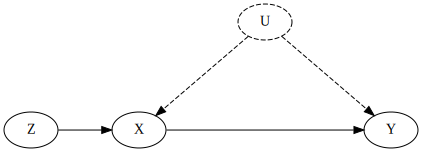

In [ ]:
graph = graphviz.Digraph(format='png', engine='neato')

nodes = ['Z', 'X', 'Y', 'U']
positions = ['0,0!', '1.5,0!', '5,0!', '3.25,1.5!']

[graph.node(n, pos=pos) for n, pos in zip(nodes, positions)]

# Overwrite style
graph.node('U', style='dashed')

graph.edge('U', 'X', style='dashed')
graph.edge('U', 'Y', style='dashed')
graph.edge('Z', 'X')
graph.edge('X', 'Y')

graph.render(f'img/ch_06_instrumental_00')

graph

在图中，Z 是工具变量，X 是处理变量（我们感兴趣的因果变量），Y 是结果变量，U 是未观察的混杂因素。

工具变量方法的核心思想是：利用 Z 只通过 X 影响 Y 这一特性来估计 X 对 Y 的因果效应。

In [ ]:
# First, we'll build a structural causal model (SCM)
class InsrumentalSCM:

    def __init__(self, random_seed=None):
        self.random_seed = random_seed
        self.u_xy = stats.norm()
        self.u_z = stats.norm()

    def sample(self, sample_size=100):
        """Samples from the SCM"""
        if self.random_seed:
            np.random.seed(self.random_seed)

        u_xy = self.u_xy.rvs(sample_size) #rvs: return random sample of distribution
        u_z = self.u_z.rvs(sample_size)

        z = u_z               # 直接由 u_z 决定
        x = 0.7*z + 0.2*u_xy  # X 受 Z 和未观察混杂因素 u_xy 影响
        y = 0.8*x + 0.1*u_xy  # Y 受 X 和未观察混杂因素 u_xy 影响


        return z, x, y

In [ ]:
# Instantiate the SCM and sample
instr_scm = InsrumentalSCM()
z, x, y = instr_scm.sample(1000)

IV 方法的关键步骤：

1. 回归 Y on Z（lr_yz）：估计 Z 对 Y 的总效应
2. 回归 X on Z（lr_xz）：估计 Z 对 X 的效应
3. 计算因果效应：将步骤1的系数除以步骤2的系数

这种方法之所以有效，是因为 Z 只通过 X 影响 Y。因此，Z 对 Y 的总效应除以 Z 对 X 的效应，就得到了 X 对 Y 的因果效应。

In [ ]:
# Fit regression 1
lr_yz = LinearRegression()
lr_yz.fit(X=z.reshape(-1, 1), y=y)

# Fit regression 2
lr_xz = LinearRegression()
lr_xz.fit(X=z.reshape(-1, 1), y=x)

LinearRegression()

这一步是IV方法的核心。我们用 Z 对 Y 的总效应除以 Z 对 X 的效应，得到 X 对 Y 的因果效应。

为什么这样做有效？

- Z 只通过 X 影响 Y（看DAG图）。
- Z 与混杂因子 U 无关。
- 因此，Z 对 Y 的影响完全是通过改变 X 来实现的。

通过除法，我们消除了 Z 的直接影响，只保留了 X 对 Y 的因果效应。

In [ ]:
# Compute the causal effect
causal_effect = lr_yz.coef_[0] / lr_xz.coef_[0]
causal_effect

0.7999780374183798

检查是为了验证估计的因果效应是否与真实模型一致：

- random_z * .7 * .8：根据真实模型计算 Z 通过 X 对 Y 的影响
- random_z * .7 * causal_effect：使用估计的因果效应计算同样的影响

In [ ]:
# Sanity check
random_z = np.random.randn()

random_z * .7 * .8, random_z * .7 * causal_effect

(-0.2845639615790702, -0.28455614938002977)